In [1]:
#! pip install ultralytics
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import torch
import os
import cv2
import pickle
import random
import numpy as np
from ultralytics import YOLO
from tensorflow.keras.models import load_model
import sys

def sculptdata(images):
    img=cv2.imread(images)
    img=cv2.resize(img,(224,224))
    img=cv2.normalize(img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    return img

model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\jaisri/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-12-23 Python-3.10.11 torch-1.12.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [3]:
model3 = torch.hub.load('ultralytics/yolov5', 'custom', path='last.pt', force_reload=True)
model3.conf=0.60
model2 = load_model("mri_calss.h5")

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\jaisri/.cache\torch\hub\master.zip
YOLOv5  2023-12-24 Python-3.10.11 torch-1.12.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7053277 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


1/1 [==============================] - 0s 187ms/step
pituitary_tumor


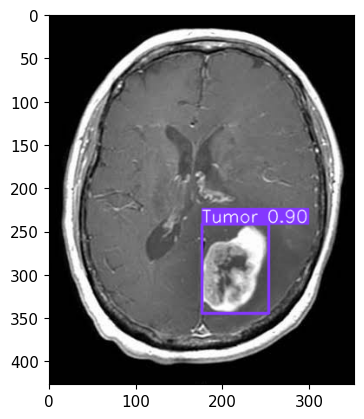

In [6]:
%matplotlib inline
sub=['no_tumor','glioma_tumor','meningioma_tumor','pituitary']
test_img="image(40).jpg"

img1=cv2.imread(test_img)
img2=sculptdata(test_img)
img3=np.array(img2).reshape(-1,224,224,3)
results = model3(img1)
pre_dat = model2.predict(img3)
print(sub[np.argmax(pre_dat)])
plt.imshow(np.squeeze(results.render()))
plt.show()